#### An explanation for how to turn P(E|H) to P(H|E), with E=Evidence and H=Hypothesis was provided in layman's terms.

####Bayes' Theorem is a mathematical concept that helps us understand the relationship between evidence and a hypothesis. Essentially, it shows us how to use evidence to update our beliefs about a hypothesis.

To understand this concept in layman's terms, let's consider a simple example. Imagine you're a detective investigating a crime and you have two suspects. You have some evidence that suggests one of the suspects is guilty, but you're not sure which one. Bayes' Theorem can help you update your beliefs about which suspect is guilty based on the evidence you have. You start with an initial belief about each suspect's guilt, then use the evidence to update those beliefs. The theorem helps you calculate the new probabilities for each suspect, based on the evidence, so that you can make a more informed decision about who is guilty.

In essence, Bayes' Theorem is a way of combining our prior beliefs about a hypothesis with new evidence to make a more informed decision. It's a powerful tool that is widely used in fields like machine learning and data analysis, where the goal is to make predictions based on data. By using Bayes' Theorem, we can make more accurate predictions by taking into account both our prior beliefs and the new evidence.



In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

In [4]:
psy = pd.read_csv('Youtube01-Psy.csv')
perry = pd.read_csv('Youtube02-KatyPerry.csv')
mm = pd.read_csv('Youtube04-Eminem.csv')
lmfao = pd.read_csv('Youtube03-LMFAO.csv')
shakira= pd.read_csv('Youtube05-Shakira.csv')


In [5]:
df = psy.append(perry).append(mm).append(lmfao)

In [6]:
df.shape

(1586, 5)

In [7]:
prob=df[['CONTENT','CLASS']]


In [8]:
model = make_pipeline(CountVectorizer(),TfidfTransformer(), MultinomialNB())

In [9]:
model.fit(prob['CONTENT'],prob['CLASS'])

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('tfidftransformer', TfidfTransformer()),
                ('multinomialnb', MultinomialNB())])

In [10]:
preds = model.predict(shakira['CONTENT'])
preds

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,

In [11]:
cm=confusion_matrix(shakira['CLASS'], preds)
cm

array([[170,  26],
       [ 15, 159]])

In [12]:
ac=accuracy_score(shakira['CLASS'], preds)
ac

0.8891891891891892

<AxesSubplot:>

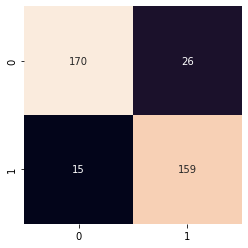

In [13]:
sns.heatmap(cm, square=True, annot=True, cbar=False, fmt= 'd')